# Bienvenidos al curso en ciencia de datos!

In [1]:
#Importando las librerias
import pandas as pd
import numpy as np

## Introducción a pandas

### Series

1. Las series son secuencias de valores de una dimencion 
2. Son bastante parecidas a los arreglos 
3. La diferencia es que cuentan con un index

#### Creando series

In [24]:
#Series como arreglos
serie = pd.Series([1, 2, 3, 4, 5])
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
#Series como diccionarios
serieDic = pd.Series({"Perro": 2, "Gato": 3, "Gallina": 4, "Caballo": 5})
serieDic

Caballo    5
Gallina    4
Gato       3
Perro      2
dtype: int64

In [5]:
#Serie de objetos
serieObj = pd.Series(["A", "B", "C", "D"], index=["AA", "BB", "CC", "DD"])
serieObj

AA    A
BB    B
CC    C
DD    D
dtype: object

In [22]:
#indices pares
serieNum = pd.Series([5, 6, 12, 45, 7], index=[0, 2, 4, 6, 8])
serieNum

0     5
2     6
4    12
6    45
8     7
dtype: int64

#### Seleccion,  operaciones matematicas, filtracion y algunos metodos

##### Seleccion

In [6]:
#Seleccion mediante slicing, del index 1 hasta el 3, no se toma el cuenta el 4 o el ultimo valor, a esto se le llama exclusivo
serie[1:4]

1    2
2    3
3    4
dtype: int64

In [9]:
#Seleccion de multiples index, si se van a elegir multiples index es necesario usar doble corchete
serieObj[["AA", "BB"]]

AA    A
BB    B
dtype: object

In [13]:
#Cambio de valor, unicamente especificar el index de valor que se quiere cambiar
print(serie)
serie[0] = 23
serie

0    1
1    2
2    3
3    4
4    5
dtype: int64


0    23
1     2
2     3
3     4
4     5
dtype: int64

##### Operaciones matematicas

operaciones simples


| operacion      | signo          |
| ------------- |-------------:|
| suma     | + |
| resta      | - |
| multiplicacion | *|
| Division | /    |

In [14]:
serie * 2

0    46
1     4
2     6
3     8
4    10
dtype: int64

**Suma de 2 series: Index Aligment**

In [25]:
#Se usan los indices para poder suma
serie + serieNum

0     6.0
1     NaN
2     9.0
3     NaN
4    17.0
6     NaN
8     NaN
dtype: float64

In [26]:
serie.add(serieNum, fill_value=0)

0     6.0
1     2.0
2     9.0
3     4.0
4    17.0
6    45.0
8     7.0
dtype: float64

**operaciones mas avanzadas**

In [15]:
np.exp(serie)

0    9.744803e+09
1    7.389056e+00
2    2.008554e+01
3    5.459815e+01
4    1.484132e+02
dtype: float64

In [16]:
np.sin(serie)

0   -0.846220
1    0.909297
2    0.141120
3   -0.756802
4   -0.958924
dtype: float64

##### Algunos metodos

In [17]:
#Desplegando el index
serie.index

RangeIndex(start=0, stop=5, step=1)

In [18]:
serieObj.index

Index(['AA', 'BB', 'CC', 'DD'], dtype='object')

In [19]:
#Despliega los valores de la serie como un numpy array
serie.values

array([23,  2,  3,  4,  5])

**Nota que serie.index y serieObj.index tienen diferentes resultados, aunque los 2 sean index uno es del tipo RangeIndex y el otro solo Index**

In [20]:
#Checa si se encuentra el 1 dentro de la serie
1 in serie

True

**Filtrando**

In [22]:
#Al momento de comparar una serie se crea una serie de booleanos, esta la puedes usar para filtrar datos
serie > 3

0     True
1    False
2    False
3     True
4     True
dtype: bool

In [23]:
#Hemos usado la serie de arriba para filtrar, los unicos index que se toman son los que contienen el true en la serie de booleanos
serie[serie > 3]

0    23
3     4
4     5
dtype: int64

### DataFrame

1. Compuesto de 2 dimenciones
2. sus filas son sus indices y sus columnas sus variables

#### Creando un DataFrame

In [24]:
#Creando un dataframe con Series
df = pd.DataFrame({"Animales": serieDic, "Letras": serieObj})
df

,Animales,Letras
AA,NaN,A
BB,NaN,B
CC,NaN,C
Caballo,5.0,NaN
DD,NaN,D
Gallina,4.0,NaN
Gato,3.0,NaN
Perro,2.0,NaN


In [5]:
#Creando un dataframe con diccionarios
dfDic = pd.DataFrame({"Animales": ["Gallina", "Perro", "Tortuga", "Caballo", "Gato"], "Cantidad": [1, 2, 3, 4, 5], "Granja": ["A", "A", "B", "C", "B"]})
dfDic

,Animales,Cantidad,Granja
0,Gallina,1,A
1,Perro,2,A
2,Tortuga,3,B
3,Caballo,4,C
4,Gato,5,B


#### Seleccion,  operaciones matematicas, filtracion y algunos metodos

##### Seleccion

Para seleccionar en un dataframe se especifica el nombre de la columna que se quiere seleccionar

In [9]:
#Seleccion con el punto
#Crea una serie
dfDic.Animales

0    Gallina
1      Perro
2    Tortuga
3    Caballo
4       Gato
Name: Animales, dtype: object

In [4]:
#Seleccion de una columna mediante brackets
#Crea una serie
dfDic["Animales"]

0    Gallina
1      Perro
2    Tortuga
3    Caballo
4       Gato
Name: Animales, dtype: object

In [5]:
#Seleccion de multiples columnas
#Para seleccionar multiples columnas recuerda usar double brackets
dfDic[["Animales", "Cantidad"]]

,Animales,Cantidad
0,Gallina,1
1,Perro,2
2,Tortuga,3
3,Caballo,4
4,Gato,5


**Seleccion con .loc e .iloc**

.loc
1. se usan los nombres del indice y las columnas
2. el slicing es inclusivo, incluye la ultima columna o indice

In [7]:
dfDic.loc[1:3, ["Animales", "Cantidad"]]

,Animales,Cantidad
1,Perro,2
2,Tortuga,3
3,Caballo,4


.iloc
1. Se usan las posiciones de las columnas y del indice
2. el slicing es exclusivo, excluye el ultimo numero

In [8]:
#Mira que va del 1 al 3 sin incluir al 3, al igual en las columnas
dfDic.iloc[1:3, 0:2 ]

,Animales,Cantidad
1,Perro,2
2,Tortuga,3


**Creando una nueva columna**

In [6]:
dfDic["Clase"] = ["Aves", "Mamifero", "Reptiles", "Mamifero", "Mamifero"]
dfDic

,Animales,Cantidad,Granja,Clase
0,Gallina,1,A,Aves
1,Perro,2,A,Mamifero
2,Tortuga,3,B,Reptiles
3,Caballo,4,C,Mamifero
4,Gato,5,B,Mamifero


**Operaciones Matematicas**

In [18]:
dfNum = pd.DataFrame(np.random.RandomState(42).randint(0, 10, (5, 4)),
                  columns=['A', 'B', 'C', 'D'])
dfNum

,A,B,C,D
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7
3,7,2,5,4
4,1,7,5,1


In [19]:
np.sin(dfNum)

,A,B,C,D
0,-0.279415,0.141120,0.656987,-0.756802
1,-0.279415,0.412118,0.909297,-0.279415
2,0.656987,-0.756802,0.141120,0.656987
3,0.656987,0.909297,-0.958924,-0.756802
4,0.841471,0.656987,-0.958924,0.841471


**Index aligment in DataFrames**

In [27]:
dfNum2 = pd.DataFrame(np.random.RandomState(42).randint(0, 10, (5, 4)),
                  columns=['A', 'B', 'D', 'E'])
dfNum + dfNum2

,A,B,C,D,E
0,12,6,NaN,11,NaN
1,12,18,NaN,8,NaN
2,14,8,NaN,10,NaN
3,14,4,NaN,9,NaN
4,2,14,NaN,6,NaN


In [29]:
dfNum.add(dfNum2, fill_value=0)

,A,B,C,D,E
0,12,6,7.0,11,4.0
1,12,18,2.0,8,6.0
2,14,8,3.0,10,7.0
3,14,4,5.0,9,4.0
4,2,14,5.0,6,1.0


##### Filtracion

In [30]:
dfDic[dfDic["Clase"] == "Mamifero"]

,Animales,Cantidad,Granja,Clase
1,Perro,2,A,Mamifero
3,Caballo,4,C,Mamifero
4,Gato,5,B,Mamifero


In [31]:
#Usando el .loc
dfDic.loc[dfDic["Clase"] == "Mamifero", ["Animales", "Cantidad"]]

,Animales,Cantidad
1,Perro,2
3,Caballo,4
4,Gato,5


In [7]:
dfDic.loc[(dfDic.Clase == "Mamifero") & (dfDic.Cantidad > 2)]

,Animales,Cantidad,Granja,Clase
3,Caballo,4,C,Mamifero
4,Gato,5,B,Mamifero


**Algunos metodos**

In [32]:
#Transpose el DataFrame
dfDic.T

,0,1,2,3,4
Animales,Gallina,Perro,Tortuga,Caballo,Gato
Cantidad,1,2,3,4,5
Granja,A,A,B,C,B
Clase,Aves,Mamifero,Reptiles,Mamifero,Mamifero


In [33]:
#Crea un numpy array de los valores del DataFrame
dfDic.values

array([['Gallina', 1, 'A', 'Aves'],
       ['Perro', 2, 'A', 'Mamifero'],
       ['Tortuga', 3, 'B', 'Reptiles'],
       ['Caballo', 4, 'C', 'Mamifero'],
       ['Gato', 5, 'B', 'Mamifero']], dtype=object)

In [34]:
dfDic.index

RangeIndex(start=0, stop=5, step=1)

In [35]:
dfDic.columns

Index(['Animales', 'Cantidad', 'Granja', 'Clase'], dtype='object')

In [36]:
dfDic.columns.name = "DataFramColumns"
dfDic

DataFramColumns,Animales,Cantidad,Granja,Clase
0,Gallina,1,A,Aves
1,Perro,2,A,Mamifero
2,Tortuga,3,B,Reptiles
3,Caballo,4,C,Mamifero
4,Gato,5,B,Mamifero


In [37]:
dfDic.index.name = "dataFrameIndex"
dfDic

DataFramColumns,Animales,Cantidad,Granja,Clase
dataFrameIndex,,,,
0,Gallina,1,A,Aves
1,Perro,2,A,Mamifero
2,Tortuga,3,B,Reptiles
3,Caballo,4,C,Mamifero
4,Gato,5,B,Mamifero


In [39]:
#Para borrar una columna
del dfDic["Clase"]
dfDic

DataFramColumns,Animales,Cantidad,Granja
dataFrameIndex,,,
0,Gallina,1,A
1,Perro,2,A
2,Tortuga,3,B
3,Caballo,4,C
4,Gato,5,B


In [40]:
"Clase" in dfDic.columns

False

## Exploratory Data Analysis

### Import Dataset

In [4]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploratory

In [42]:
#Genera informacion de cada columna del dataframe
#El total y tipo de columnas, si faltan valores y el rango de las filas
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [43]:
#genera una vista completa del dataframe, por defecto solo te muestra las primeras 5 columnas, para que muestra mas tienes que poner el numero de filas dentro del metodo
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#tail es como el head, solo que muestra los ultimos 5 valores del dataframe
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [45]:
#El describe te muestra gran parte de la estadistica de los datos 
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
#El value_counts solo se aplica a Series de tipo categorical o discrete variable, (lo puedes hacer en continuo pero no es muy recomendable)
#Te muestra el total de dato para cada valor categorico/discreto
titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
#El unique solo muestra los valores unicos de la columna seleccionada
titanic_train.Sex.unique()

array(['male', 'female'], dtype=object)

Correlation
1. Mide la fuerza de correlation entre 2 variables: Correlation coefficient and P-value

Correlation Coefficient:
1. Cercano a +1: Fuerte relacion positiva
2. Cercano a -1: Fuerte relacion negativa
2. Cercano a 0: Sin correlacion o muy debil

P-value
1. P-value < 0.001 **Strong*** certainty in the result
2. P-value < 0.05 **Moderate** certainty in the result
3. P-value < 0.1 **Weak** certainty in the result
4. P-value > 0.1 **No** certainty in the result

In [24]:
corr_matrix = titanic_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#### Exploracion Visual

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

**Un poco de matplotlib**
matplotlib funciona sobre 3 capas distintas
1. The backend layer
2. The artist layer
3. The Scripting layer

##### Histograms

1. Usado para saber la frecuencia de datos continuos
2. el x label son datos continuos, mientras la y label es la frecuencia
3. los bins son la separacion de los datos, para saber en que rango caen
4. is a way of representing the frecuency distribution of a variable

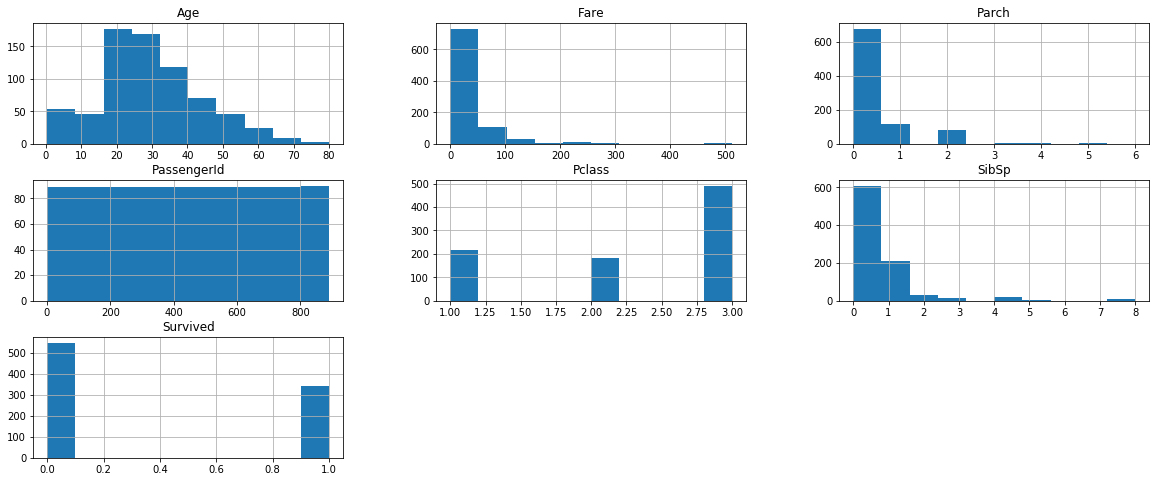

In [6]:
#Te genera un histograma solo de los datos de tipo numerico
titanic_train.hist(figsize=(20, 8))
plt.show()

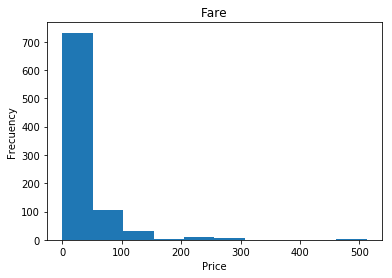

In [7]:
#Para checar solo una columna
titanic_train["Fare"].plot(kind="hist")
plt.title("Fare")
plt.ylabel("Frecuency")
plt.xlabel("Price")
plt.show()

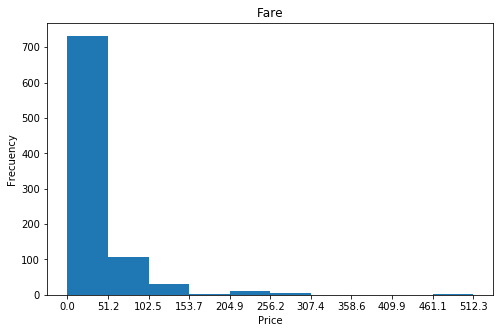

In [9]:
count, bin_edges = np.histogram(titanic_train["Fare"])

titanic_train["Fare"].plot(kind="hist", xticks= bin_edges, figsize=(8, 5))
plt.title("Fare")
plt.ylabel("Frecuency")
plt.xlabel("Price")
plt.show()

#### Bar Chart

1. Usado para saber la frecuencia de datos puntuales o categoricos
2. Compare the values of the variables at a given point in time
3. El barchart usa el index para las barras y la columna como la frecuencia
4. Es necesario que en la serie se cuente con la frecuencia de cada dato

In [11]:
#Creando la serie con la frecuencia de cada dato
sex_serie = titanic_train["Sex"].value_counts()
sex_serie

male      577
female    314
Name: Sex, dtype: int64

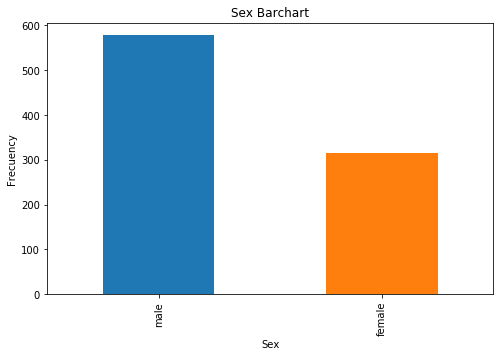

In [14]:
sex_serie.plot(kind="bar", figsize=(8, 5))
plt.title("Sex Barchart")
plt.ylabel("Frecuency")
plt.xlabel("Sex")
plt.show()

##### Boxplot

1. Sirve para sacar datos estadisticos de una variable, preferentemente del tipo continua
2. Sacas los quartiles, median, maximum, minimum, outliers

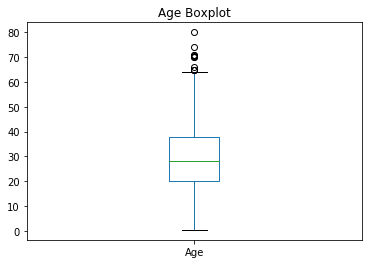

In [20]:
titanic_train.loc[:, ["Age"]].plot(kind="box")
plt.title("Age Boxplot")
plt.show()

##### Scatter

1. Sirve para saber la correlacion de 2 variables
2. Se aplica mejor con datos continuos

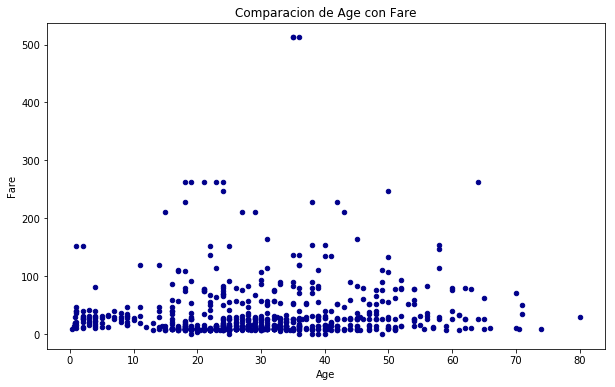

In [22]:
titanic_train[["Age", "Fare"]].plot(kind='scatter', x='Age', y='Fare', figsize=(10, 6), color='darkblue')

plt.title('Comparacion de Age con Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

In [23]:
titanic_train[titanic_train["Age"] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


## Preparacion y limpieza de datos

### Problemas comunes con los datos

* Nombres de columnas inconsistentes
* Datos faltantes
* Outliers (Valores atipicos)
* Filas duplicadas
* untidy
* Tipos de columnas
* Columnas contienen informacion multiple

In [8]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Problemas: valores faltantes

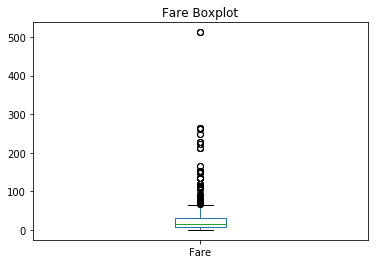

In [10]:
titanic_train.loc[:, ["Fare"]].plot(kind="box")
plt.title("Fare Boxplot")
plt.show()

* Problems: Outliers

In [11]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Problema: tipos de columnas

#### Tidy data

Manera estandar de organizar los datos en un dataset

* Columnas representan variables separadas
* Filas representan observaciones individuales

In [12]:
#Ejemplo de un dataset untidy
untidyDF = pd.DataFrame({0 : ["Daniel", np.nan, 42], 1: ["Jhon", 12, 31], 2: ["Jane", 24, 37] }, index=["nombre", "Tratamiento a", "Tratamiento b"])
untidyDF

,0,1,2
nombre,Daniel,Jhon,Jane
Tratamiento a,NaN,12,24
Tratamiento b,42,31,37


Problemas:
* Los nombres de columna no tienen ni un significado
* Las columnas no representan variables separadas, al contrario, cada columna es igual, 0 comparte los mismo tipos de variable que 1 y 2
* Las filas no representan observaciones individuales, representan variables

**Columnas con informacion multiple**

In [14]:
multiDF = pd.DataFrame({"Country" : ["MX", "US", "CA"], "Year": [2000, 2000, 2000], "M014": [0, 2, 52], "F014": [0, 4, 228] })
multiDF

,Country,F014,M014,Year
0,MX,0,0,2000
1,US,4,2,2000
2,CA,228,52,2000


F014 M014 <- la primera letra representa el sexo de la persona, F o M, el resto la edad: de 0 a 14.

### Manejando valores faltantes

#### NaN

* Pandas maneja sus valores faltantes como NaN. El NaN solo es usado en columnas con valores de tipo "Float" u "Object", 
* Cuando una columna de tipo int o boolean contiene valores faltantes, entonces dicha columna es casteada a float (si es entero) u object (si es boolean).
* Si tratas de realizar cualquier operacion matematica con un NaN como: 1 + NaN, dicha operacion siempre dara un NaN

In [3]:
1 + np.nan

nan

#### Detectando valores faltantes

In [7]:
# Vamos a usar el dataset del titanic
titanic_train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
#Usamos el .any para saber si al menos un valor dentro de la columna es del tipo NaN
titanic_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Observamos que hay 3 columnas que contienen por lo menos un valor del tipo NaN.

Si quisieramos saber quienes con dichos valores entonces usamos el siguiente metodo.

In [9]:
titanic_train[titanic_train["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


#### Manejando valores faltantes

Las operaciones mas comunes para lidiar con este tipo de datos son:
* Drop - eliminarlos
* Reemplazar los valores faltantes con su promedio o frecuencia
* Dejar los valores faltantes

##### Drop Missing values

Usar solamente cuando tenemos pocas filas con valores faltantes

In [16]:
newDF = titanic_train.dropna()
print(newDF.isnull().any())
newDF.info()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [19]:
# Tambien podemos eliminar las filas con valores faltantes de una columna especifica
newDF2 = titanic_train.dropna(subset=["Embarked"], axis=0)
print(newDF2.info())
newDF2.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB
None


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

Como ves el df se redujo a solo 889 filas, pero ya no tenemos valores faltantes en Embarked

##### Reemplazando los valores faltantes

El metodo del reemplazo es el mas usado, aqui unos consejos
* Reemplazar con el promedio cuando los datos son numericos
* Reemplazar con frecuencia cuando los datos son categoricos
* Tambien se puede usar el metodo fillna para reemplzarlo de manera no tan aleatoria

**Usando el reemplazo numerico**

In [20]:
#Para esto usaremos como ejemplo la columna Age
meanAge = titanic_train["Age"].mean()
AgeFixedSerie = titanic_train["Age"].replace(np.nan, meanAge)
AgeFixedSerie.isnull().any()

False

**Usando el reemplazo en categoricos**

In [42]:
#Para esto usaremos embarked
moda = titanic_train["Embarked"].mode()[0]
print(moda)
EmbarkedFixedSerie = titanic_train["Embarked"].replace(np.nan, moda)
EmbarkedFixedSerie.isnull().any()

S


False

**Usando fillna**

Los metodos mas usados del fillna son: ffill y bfill
* ffill rellena los valores faltantes usando al valor siguiente
* bfill rellena los valores faltantes usando al valor anterior

In [48]:
AgeFfill = titanic_train["Age"].fillna("ffill")
AgeFfill.isnull().any()

False

### Transformacion de datos